# Lab4 Introduction to Reinforcement Learning

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/rl.png?raw=1' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br> 
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [1]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env as env

### Environment - Cliff Gridworld

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/grid.png?raw=1' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point.
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [2]:
# Initialize environment
env = env.World()

In [3]:
env.available_actions()

['up', 'down', 'left', 'right']

### Define Random Agent

Define an agent that walk randomly.

In [4]:
# Define Random Agent Object
class DumbAgent():
    def action(self, available_actions):
        return np.random.choice(available_actions)

In [5]:
# Test your code
agent = DumbAgent()
agent.action([1,2,3,4])

3

###  Define a Q-Agent

Define an agent that used q-learning using the following pseudocode: </br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/q_learning.png?raw=1'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [6]:
class Q_Agent():
    
    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}
                
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        
    def action(self, available_actions):
        #
        # Code here
        #
        if np.random.uniform(0,1) < self.epsilon:
            # Exploration
            return np.random.choice(available_actions)
        else:
            # Exploitation
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values())
            # random if you have multiple max value
            return np.random.choice([key for key, value in S.items() if value == max_value])
            
            
    def update(self, current_state, reward, next_state, actions):
        #
        # Code here
        #
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_Q_value = self.q_table[current_state][actions]
        
        # From the equation in pseudocode
        self.q_table[current_state][actions] = current_Q_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_Q_value)

###  Deploy Your Agent

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>
For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn: 
    agent.update( ... )
```

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

In [7]:
def run(env, agent, trials, max_steps_per_episode, learn=False):
    
    total_reward = []
    for trial in range(trials):
        
        sum_reward = 0
        step = 0
        game_over = False
        while step < max_steps_per_episode and not game_over:
            
            # Code here
            # Sent the action to environment and get the next state 
            # and reward
            current_state = env.current_location
            action = agent.action(env.actions)
            reward = env.move_agent(action)
            next_state = env.current_location
            
            if learn:
                agent.update(current_state, reward, next_state, action)
            
            sum_reward += reward
            step += 1
            
            if env.end_state():
                env.reset()
                game_over = True
        
        total_reward.append(sum_reward)
    
    return total_reward

In [8]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### Run a Dump Agent

In [9]:
## Run
env.reset()
agent = DumbAgent()
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=False)

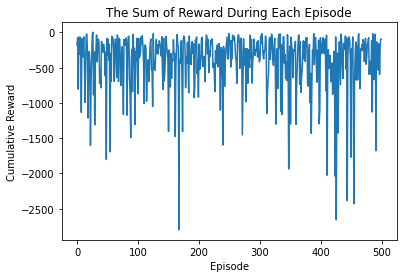

In [10]:
## Plot reward
plot_total_reward(total_reward)

### Run an Q-Agent

In [11]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

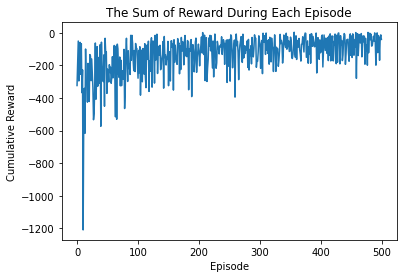

In [12]:
## Plot reward
plot_total_reward(total_reward)

### Show Q-Table

Show the agent's Q-table using to make a decision.

In [13]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [14]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-3.5793682578791386
	down
		-3.5728733374756043
	left
		-3.588543360624555
	right
		-3.582294036426436
(0, 1)
	up
		-3.5790512937157537
	down
		-3.581870804979119
	left
		-3.5814235400924015
	right
		-3.5883043917370676
(0, 2)
	up
		-3.5492093867649332
	down
		-3.549654254985079
	left
		-3.5465273657788776
	right
		-3.5453952136551967
(0, 3)
	up
		-3.4796632904234244
	down
		-3.4827906588537267
	left
		-3.4745371592632854
	right
		-3.503843822243476
(0, 4)
	up
		-0.4
	down
		-0.3997294134931003
	left
		-0.4168377409450692
	right
		-0.398
(0, 5)
	up
		-0.4
	down
		-0.4
	left
		-0.2
	right
		-0.398
(0, 6)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.398
(0, 7)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.3988513282682854
(0, 8)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.12104532965302599
(0, 9)
	up
		-1.2400000000000009
	down
		-1.2465767182007286
	left
		-1.3615449556116679
	right
		-1.2398980316169257
(1, 0)
	up
		-3.57080375785316
	down
		-3.5646759288008116

### alpha=0.01, gamma=-1, epsilon=0.05

In [15]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=-1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

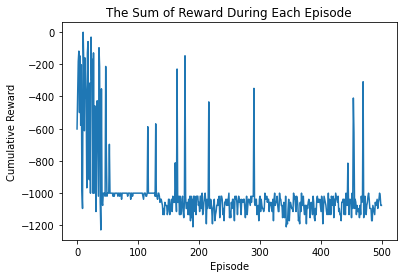

In [16]:
## Plot reward
plot_total_reward(total_reward)

In [17]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-0.49686696908187017
	down
		-0.4969065881108341
	left
		-0.496867194367624
	right
		-0.4969013081322129
(0, 1)
	up
		-0.4990809149889481
	down
		-0.49816137004205346
	left
		-0.49963077894426033
	right
		-0.49854086462181985
(0, 2)
	up
		-0.4999999999999986
	down
		-0.5018368758448182
	left
		-0.5018378118113288
	right
		-0.5011370505455047
(0, 3)
	up
		-0.5011331912049348
	down
		-0.4988635937049565
	left
		-0.4999985892688147
	right
		-19.477574459806366
(0, 4)
	up
		-2.571678465044888
	down
		-1.6990904214267508
	left
		-0.5004632727603213
	right
		-2.5518418050674776
(0, 5)
	up
		-1.1470982124308315
	down
		-1.1666665515561059
	left
		-1.150689206462099
	right
		-1.1566771650770287
(0, 6)
	up
		-0.58808
	down
		-0.593445724467882
	left
		-0.5841773760847483
	right
		-0.59004
(0, 7)
	up
		-0.396
	down
		-0.39754965012445664
	left
		-0.396
	right
		-0.2
(0, 8)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.02754205029159359
(0, 9)
	up
		-0.27715073091578984
	down
		-0

### alpha=0.05, gamma=1, epsilon=0.05

In [18]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.05, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

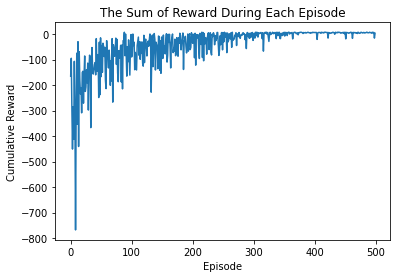

In [19]:
## Plot reward
plot_total_reward(total_reward)

In [20]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-6.69473286739824
	down
		-6.741124990871073
	left
		-6.699492214594127
	right
		-6.703046446573927
(0, 1)
	up
		-6.795583741312085
	down
		-6.7712171896267
	left
		-6.731275233093104
	right
		-6.732657616615873
(0, 2)
	up
		-6.591883982811584
	down
		-6.607933078934406
	left
		-6.574277754893925
	right
		-6.556669723575496
(0, 3)
	up
		-6.298701081581844
	down
		-6.326614232263573
	left
		-6.358548449997981
	right
		-7.605319678203223
(0, 4)
	up
		-2.0
	down
		-1.9994133180417983
	left
		-1.4167999067482013
	right
		-1.9500000000000002
(0, 5)
	up
		-1.0
	down
		-1.041265520086721
	left
		-1.9500000000000002
	right
		-1.0
(0, 6)
	up
		0
	down
		-1.0
	left
		-1.0
	right
		-1.0
(0, 7)
	up
		-1.0
	down
		-1.0
	left
		-1.0
	right
		-1.0
(0, 8)
	up
		-1.0
	down
		-1.0
	left
		-1.0
	right
		-0.5093936532993488
(0, 9)
	up
		-1.6498750000000009
	down
		-1.6614205661556711
	left
		-4.57244103070646
	right
		-1.6451187500000009
(1, 0)
	up
		-6.699341601291863
	down
		-6.705124133796

### alpha=0.01, gamma=2, epsilon=0.05

In [21]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=2, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

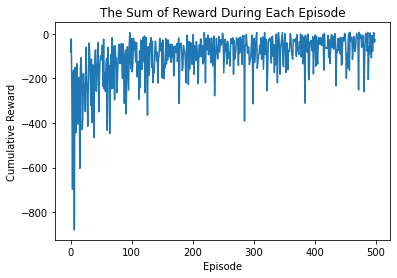

In [22]:
## Plot reward
plot_total_reward(total_reward)

In [23]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-10.20913108017242
	down
		-10.306019719511868
	left
		-10.211162775323968
	right
		-10.283233293807637
(0, 1)
	up
		-10.327237380973163
	down
		-10.369551567905244
	left
		-10.325118075875011
	right
		-10.388919657236718
(0, 2)
	up
		-9.985196734135906
	down
		-10.021981246027938
	left
		-9.953216817274672
	right
		-10.027944475039218
(0, 3)
	up
		-9.15494364834638
	down
		-9.224465259146378
	left
		-9.178806362936568
	right
		-9.277319138029508
(0, 4)
	up
		-3.447139107407139
	down
		-3.3360506312509104
	left
		-3.3473264757724444
	right
		-3.432774170947934
(0, 5)
	up
		-1.873705453687218
	down
		-1.8293105602657067
	left
		-1.9897996492653343
	right
		-2.0026097656361044
(0, 6)
	up
		-1.020201002
	down
		-1.2075922975621776
	left
		-1.0564222542427681
	right
		-1.1980645781627244
(0, 7)
	up
		-0.60602
	down
		-0.598218
	left
		-0.6220921589628201
	right
		-0.6001614311660274
(0, 8)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.18570179408555867
(0, 9)
	up
		-1.12881

### alpha=1.0, gamma=0.99, epsilon=0.05

In [24]:
## Run
env.reset()
agent = Q_Agent(env, alpha=1.0, gamma=0.99, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

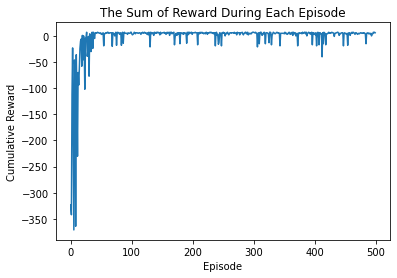

In [25]:
## Plot reward
plot_total_reward(total_reward)

In [26]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-8.64827525163591
	down
		-9.561792499119552
	left
		-8.64827525163591
	right
		-10.466174574128356
(0, 1)
	up
		-9.561792499119552
	down
		-10.466174574128356
	left
		-9.561792499119552
	right
		2.174932531385078
(0, 2)
	up
		-9.561792499119552
	down
		3.207002556954624
	left
		-9.561792499119552
	right
		-9.561792499119552
(0, 3)
	up
		-9.561792499119552
	down
		4.249497532277398
	left
		-10.466174574128356
	right
		-20.0
(0, 4)
	up
		-20.0
	down
		-20.0
	left
		-1.99
	right
		-20.0
(0, 5)
	up
		-20.0
	down
		-20.0
	left
		-20.0
	right
		-20.0
(0, 6)
	up
		-20.0
	down
		-20.0
	left
		-20.0
	right
		-20.0
(0, 7)
	up
		0
	down
		0
	left
		-20.0
	right
		-20.0
(0, 8)
	up
		0
	down
		-20.99
	left
		-20.0
	right
		-1.0
(0, 9)
	up
		-4.90099501
	down
		-5.8519850599
	left
		-20.0
	right
		-4.90099501
(1, 0)
	up
		-9.561792499119552
	down
		-10.466174574128356
	left
		-9.561792499119552
	right
		2.1749325313850782
(1, 1)
	up
		1.153183206071228
	down
		3.207002556954624
	left
	

### alpha=0.01, gamma=1, epsilon=0.1

In [30]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.1)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

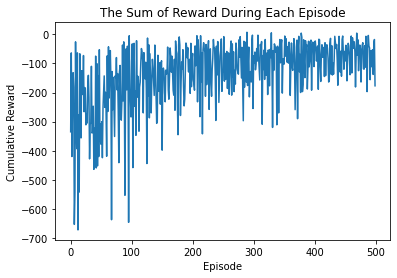

In [31]:
## Plot reward
plot_total_reward(total_reward)

In [32]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-3.558680965876901
	down
		-3.5615446722178765
	left
		-3.559036308742168
	right
		-3.5523500336226586
(0, 1)
	up
		-3.568307952961837
	down
		-3.5658611320296125
	left
		-3.5684531380605753
	right
		-3.567408730029805
(0, 2)
	up
		-3.5287328353854894
	down
		-3.5339667578259624
	left
		-3.5373681337494656
	right
		-3.528644381113782
(0, 3)
	up
		-3.4587744282507304
	down
		-3.4564297412114655
	left
		-3.461185806120654
	right
		-4.966519471113338
(0, 4)
	up
		-0.6000000000000001
	down
		-0.5985314624496794
	left
		-0.5998227861547425
	right
		-0.5960220601066841
(0, 5)
	up
		-0.4
	down
		-0.5998858681913237
	left
		-0.4021974609873055
	right
		-0.4
(0, 6)
	up
		-0.2
	down
		-0.4001884449163797
	left
		-0.2
	right
		-0.4
(0, 7)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.39884101045106946
(0, 8)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.1570447656910484
(0, 9)
	up
		-1.2595861970701288
	down
		-1.2643061305276513
	left
		-1.9180494925435658
	right
		-1.25988607

### แนวโน้ม reward รวมที่ได้รับในแต่ละ episode นั้น จะดีขึ้นเรื่อย ๆ
### เพิ่ม alpha ทำให้ step size/learning rate สูงขึ้น
### เพิ่ม gamma ทำให้ discount rate สูงขึ้น
### เพิ่ม epsilon สูงจะทำให้ agent เรามีโอกาสที่จะพบ action ที่ดีที่สุดได้เร็วขึ้น